# Gradient Boosting

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [2]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/체질검사.csv", engine = "python", encoding="CP949")
df_raw.shape

(252, 14)

In [3]:
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

In [24]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=42)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [6]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.981
Score on test set : 0.584


In [7]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range (1,11)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingRegressor(random_state = 1234
                                   ,n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score


df_score_n["D"] = df_score_n["TrainScore"]-df_score_n["TestScore"]

df_score_n.round(3)

,n_estimators,TrainScore,TestScore,D
0,10,0.712,0.512,0.199
1,20,0.850,0.589,0.261
2,30,0.897,0.600,0.297
3,40,0.921,0.599,0.322
4,50,0.942,0.587,0.355
5,60,0.954,0.589,0.365
6,70,0.963,0.590,0.373
7,80,0.970,0.584,0.386
8,90,0.976,0.585,0.390
9,100,0.981,0.584,0.396


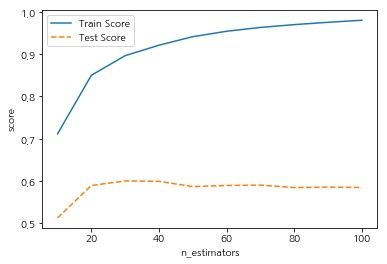

In [8]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [9]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range (1,21)]

for v_min_samples_leaf in para_leaf :
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30,
                                   min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["MinSamplesLeaf"] = para_leaf
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score


df_score_n["D"] = df_score_n["TrainScore"]-df_score_n["TestScore"]

df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore,D
0,1,0.897,0.600,0.297
1,2,0.899,0.596,0.303
2,3,0.896,0.595,0.302
3,4,0.893,0.586,0.307
4,5,0.890,0.604,0.286
5,6,0.888,0.596,0.292
6,7,0.884,0.590,0.294
7,8,0.874,0.610,0.263
8,9,0.879,0.598,0.281
9,10,0.873,0.587,0.285


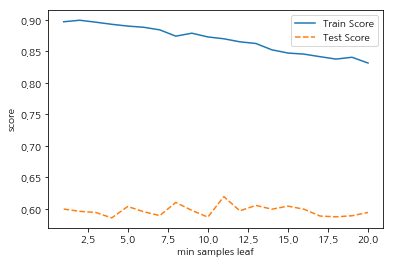

In [10]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [11]:
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(11, 31)]

for v_min_samples_split in para_split :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf=11,
                                    min_samples_split = v_min_samples_split)
    gb.fit (df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score


df_score_split["D"] = df_score_split["TrainScore"]-df_score_split["TestScore"]

df_score_split.round(3)

,MinSampleSplit,TrainScore,TestScore,D
0,22,0.870,0.620,0.250
1,24,0.868,0.614,0.254
2,26,0.868,0.617,0.251
3,28,0.863,0.617,0.245
4,30,0.860,0.617,0.243
5,32,0.862,0.611,0.251
6,34,0.855,0.616,0.239
7,36,0.853,0.608,0.245
8,38,0.854,0.610,0.244
9,40,0.854,0.617,0.236


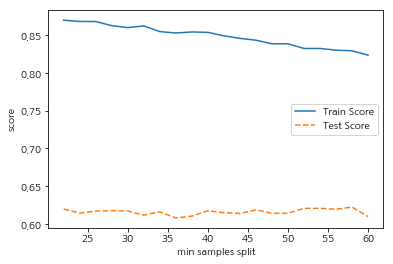

In [12]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [13]:
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf=11, min_samples_split =58,
                                    max_depth = v_max_depth)
    gb.fit (df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score


df_score_depth["D"] = df_score_depth["TrainScore"]-df_score_depth["TestScore"]

df_score_depth.round(3)

,Depth,TrainScore,TestScore,D
0,1,0.703,0.592,0.112
1,2,0.791,0.606,0.185
2,3,0.829,0.622,0.207
3,4,0.850,0.602,0.248
4,5,0.853,0.609,0.244
5,6,0.859,0.610,0.249
6,7,0.860,0.609,0.251
7,8,0.861,0.608,0.253
8,9,0.861,0.610,0.251
9,10,0.861,0.610,0.251


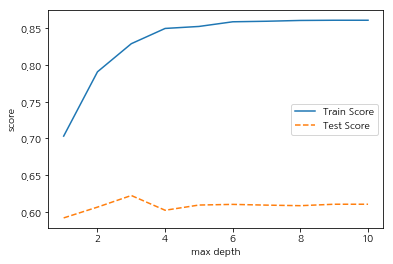

In [14]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [15]:
train_score = []; test_score = []

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr :
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf=11, min_samples_split =58,
                                   max_depth =3, learning_rate = v_learning_rate)
    gb.fit (df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["Learning Rate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score


df_score_lr["D"] = df_score_lr["TrainScore"]-df_score_lr["TestScore"]

df_score_lr.round(3)

,Learning Rate,TrainScore,TestScore,D
0,0.1,0.829,0.622,0.207
1,0.2,0.897,0.620,0.277
2,0.3,0.923,0.623,0.300
3,0.4,0.936,0.610,0.326
4,0.5,0.947,0.583,0.365
5,0.6,0.957,0.591,0.366
6,0.7,0.963,0.478,0.484
7,0.8,0.966,0.480,0.485
8,0.9,0.963,0.460,0.503


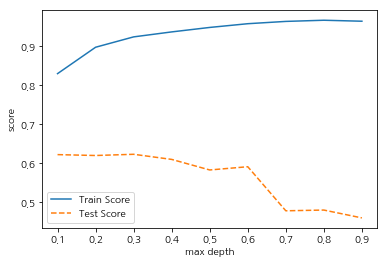

In [16]:
plt.plot(para_lr, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [25]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 60, min_samples_leaf=4, min_samples_split =16,
                                   max_depth =4, learning_rate =0.1)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("score on test seg: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Score on training set: 0.968
score on test seg: 0.730


In [18]:
gb_final

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=16, min_weight_fraction_leaf=0.0,
             n_estimators=60, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.700
2,HEIGHT,0.069
4,CHEST,0.048
12,WRIST,0.034
6,HIP,0.026
7,THIGH,0.023
3,NECK,0.019
10,BICEPS,0.017
9,ANKLE,0.017
8,KNEE,0.016


Text(0, 0.5, '변수')

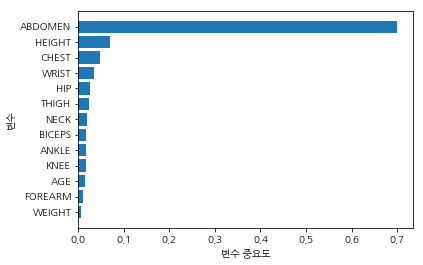

In [20]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [ ]:
estimator = GradientBoostingRegressor()

param_grid = {"criterion" : ["mse","friedman_mse", "mae"], "max_features":["auto", "sqrt", "log2"],
              "learning_rate":para_lr, "max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score:\n{}".format(grid_gb.best_score_.round(3)))